In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
from matplotlib import *
from __future__ import division

In [35]:
mpl_params = {'text.usetex': True,
              'font.family': 'serif',
              'font.serif': 'Computer Modern',
              'text.latex.preamble': [r'\usepackage{engsymbols}',
                                      r'\usepackage{magref}']}
#plt.rcParams.update(mpl_params)

In [36]:
def set_all_fontsizes_from_axis(ax):
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
            
        item.set_fontsize(16)

In [37]:
def fan_function(a,b):
    P = a*x+b
    return P

In [68]:
x = np.arange(10,1501.01,1)
#Fan_L = fan_function(-0.2*0.46629,28.91)
#Fan_M = fan_function(-0.2*0.47775,38.22)
#Fan_H = fan_function(-0.2*0.4802,48.02)

Fan_L = fan_function(-0.25*1.5,400)
Fan_M = fan_function(-0.25*1.5,500)
Fan_H = fan_function(-0.25*1.5,600)


#Fan_L = fan_function(-0.3636,20)
#Fan_M = fan_function(-0.512,42) 
#Fan_H = fan_function(-0.55,55)

UA_Vent = np.zeros([6,3])
cfm_Vent= np.zeros([6,3])
W_Vent= np.zeros([6,3])
dP_Vent= np.zeros([6,3])
UA = np.zeros([6,len(x)])
W_f = np.zeros([6,len(x)])

Ca_vent = np.zeros([6,3])
Ca = np.zeros(len(x))
NTU = np.zeros([len(x),6])
Cr = np.zeros(len(x))
K1 = np.zeros([len(x),6])
E = np.zeros([6,len(x)])
ECr = np.zeros([6,len(x)])
QECr = np.zeros([6,len(x)])
QW = np.zeros([6,len(x)])

E_vent = np.zeros([6,3])
K1_vent = np.zeros([6,3])
Ca_vent = np.zeros([6,3])
NTU_vent = np.zeros([6,3])
Cr_vent = np.zeros([6,3])
ECr_vent=np.zeros([6,3])
QECr_vent=np.zeros([6,3])
QW_vent=np.zeros([6,3])

In [69]:
#escolher arranjo = 0,1 ou 2
arranjo = 2
i = 0

Trocador de duas fileiras

L1 = 0.11
L2 = 0.043
L3 = 0.1524

Xl = 0.024
Xt = 0.0215

N aletas = 39



Trocador de uma fileira

L1 = 0.112
L2 = 0.0215
L3 = 0.127

Xt = 0.025
Xl = 0.0215

N_aletas = 61

In [81]:
#Dimensões do trocador
L1 = 0.32*1.5
L2 = 0.033*4 #0.0215 #0.043
L3 = 0.0381*10  #0.125 #0.152

Di = 0.01588 #694
De = 0.0163 #794

Xt = 0.0381
Xl = 0.033

Nfin = 100/L1

Deltaf = 0.00015 #0.00025

delta_h = 0.0016

Dc = De+2*Deltaf

N_r = L2/Xl


if (arranjo == 0): 
    N_t = (L2*L3)/(Xl*Xt)
if (arranjo == 1):
    N_t = (L3/Xt)*(L2/Xl+1)/2+(L3/Xt-1)*(L2/Xl-1)/2
if (arranjo == 2):
    N_t = 0.5*(L2/Xl)*(2*L3/Xt-1)

    
print(N_t)
#N_t = 12
rho = 1.269 #ar 5ºC
mi = 17.23e-6
cp_ar = 1005
Pr_ar = 0.695 #aprox para 375K
Nfin,Dc*1000

38.0


(208.33333333333334, 16.6)

L3 = 2
L2 = 4
Xl = 1
Xt = 1

N_r = L2/Xl
N_t_1 = (L2*L3)/(Xl*Xt)
N_t_2 = (L3/Xt)*(L2/Xl+1)/2+(L3/Xt-1)*(L2/Xl-1)/2
N_t_3 = 0.5*(L2/Xl)*(2*L3/Xt-1)
N_t_1,N_t_2,N_t_3,N_r%2

In [83]:
#Inputs Wave

x_f = 0.007 # Mesmo
p_d = 0.0018 #Mesmo
theta = np.arctan(p_d/x_f) #*180/(np.pi)
p_f = 1/Nfin
theta*180/3.1415

14.421198445479424

In [84]:
#equações da parede
k_w = 238.8 #aproximado
Rt_CD = math.log(De/Di)/(2*np.pi*L1*N_t*k_w)

In [89]:
Delta_Pe_list = []
Rte_list = []
for vazao_cfm in x:
    vazao = vazao_cfm *0.00047194745 #m^3/s
    #Perda de carga externa
    if (arranjo==0):
        Amin_e = ((Xt-De)*L1-(Xt-De)*Deltaf*Nfin*L1)*(L3/Xt)
    else:
        pt = ((Xt/2)**2+Xl**2)**0.5
        a = ((Xt-De)-(Xt-De)*Deltaf*Nfin)/2
        b = (pt-De)-(Xt-De)*Deltaf*Nfin
        if (a<b):
            c=2*a
        else:
            c=2*b
        Amin_e = ((L3/Xt-1)*c+(Xt-De)-(Xt-De)*Deltaf*Nfin)*L1       
        
    Afr = L1*L3
    sigma = Amin_e/Afr
    Ae_p = np.pi*De*(L1-Deltaf*Nfin*L1)*N_t+2*(L2*L3-np.pi*De**2*N_t/4)
    Ae_f = 2*Nfin*L1*(L2*L3-np.pi*De**2*N_t/4)+2*L3*Deltaf*Nfin*L1
    Ae = Ae_p+Ae_f
    At = np.pi*De*L1*N_t
    sigmae = (L1*L3-L3*Deltaf*Nfin*L1)/(L3*L1)
    d_h=(4*Amin_e*L2)/Ae
    d_c = Dc

    uar = vazao/(L1*L3)
    u_max = uar/sigma

    Re = u_max*rho*Dc/mi
    
    #c5 = 0.4606-0.01336*((p_f/Xl)**0.58)*(math.log(Ae/At))*(math.tan(theta))**(-1.5)
    #c6 = 3.247*(p_f/Xt)**1.4*math.log(Ae/At)
    #c7 = -20.113/(math.log(Re))   
    
    c1 = -0.1707-1.374*(Xl/Deltaf)**(-0.493)*(p_f/d_c)**(-0.886)*N_r**(-0.143)*(p_d/x_f)**(-0.0296)
    c2 = 0.1714-0.07372*(p_f/Xl)**0.25*np.log(Ae/At)*(p_d/x_f)**(-0.2)
    c3 = 0.426*(p_f/Xt)**0.3*np.log(Ae/At)
    c4 = -10.2192/np.log(Re)
    
    #fe = 0.01915*(Re**c5)*((math.tan(theta))**c6)*((p_f/Xl)**c7)*((math.log(Ae/At))**(-5.35))*((d_h/d_c)**1.3796)*(N_r**(-0.0916))   
    fe = 0.05273*Re**c2*(p_d/x_f)**c3*(p_f/Xt)**c4*np.log(Ae/At)**(-2.726)*(d_h/d_c)**0.1325*N_r**-0.02305
    Ge = rho*u_max

    Delta_Pe = Ge**2/(2*rho)*((fe*(Ae/Amin_e))) #+(1+sigmae**2))#falta um termo
    print(fe,Delta_Pe,Re,u_max)
    Delta_Pe_list.append(Delta_Pe) 
    
    
    #Resistência térmica externa
    
    #c1 = -0.229 + 0.115*((p_f/d_c)**0.6)*((Xl/d_h)**0.54)*(N_r**(-0.284))*math.log(0.5*math.tan(theta)) 
    #c2 = -0.251 + (0.232*N_r**(1.37))/(math.log(Re)-2.303)
    #c3 = -0.439*(p_f/d_h)**(0.09)*(Xl/Xt)**(-1.75)*N_r**(-0.93)
    #c4 = 0.502*(math.log(Re)-2.54)
    
    #je = 0.324*(Re**c1)*((p_f/Xl)**c2)*((math.tan(theta))**c3)*((Xl/Xt)**c4)*N_r**0.428
    je = 1.7910*Re**c1*(Xl/Deltaf)**-0.456*N_r**-0.27*(p_f/d_c)**-1.343*(p_d/x_f)**0.317
    
    he = je*rho*u_max*cp_ar*Pr_ar**(-0.666666)
    m = ((2*he)/(k_w*Deltaf))**0.5
    #print(je,he)
    P_m = Xt/2
    P_l = (((Xt/2)**2+Xl**2)**0.5)/2
    R_eq =1.27*P_m*(P_l/P_m-0.3)**0.5
    phi = (R_eq/(Di/2)-1)*(1+0.35*math.log(R_eq/(Di/2)))
    eta = math.tanh(m*(Di/2)*phi)/(m*(Di/2)*phi)
    eta_e =1-(Ae_f/Ae)*(1-eta)
    
    Rt_CE = 1/(eta_e*he*Ae)
    Rte_list.append(Rt_CE)
    
print(c1,c2,c3,c4)


0.46944179654337687 0.06033680163677035 56.920490002176216 0.04655691526092532
0.4173872535232335 0.06491201390555573 62.61253900239384 0.051212606787017854
0.3767091297084577 0.06972189278827096 68.30458800261145 0.05586829831311038
0.3440917895380215 0.07474145455983228 73.99663700282908 0.060523989839202916
0.3173790745755996 0.07995302352362675 79.6886860030467 0.06517968136529545
0.2951126891468713 0.08534359490885793 85.38073500326432 0.06983537289138798
0.27627337320052064 0.09090327428874193 91.07278400348193 0.0744910644174805
0.26012856345788943 0.09662431237603494 96.76483300369958 0.07914675594357305
0.24613897043578875 0.10250048511512586 102.45688200391719 0.08380244746966557
0.2338992309894751 0.10852668233145452 108.14893100413481 0.0884581389957581
0.22309903736787468 0.11469862685544706 113.84098000435243 0.09311383052185064
0.21349698725428792 0.12101267782297948 119.53302900457004 0.09776952204794316
0.2049025710912543 0.12746568978028697 125.22507800478768 0.102425

0.041262609652787295 11.965874446794244 2703.72327510337 2.2114534748939523
0.041236072449516825 12.008582066366035 2709.415324103588 2.216109166420045
0.041209623527573985 12.051356561890644 2715.1073731038055 2.2207648579461376
0.04118326239595547 12.094197909611296 2720.7994221040235 2.2254205494722306
0.04115698856746004 12.13710608583827 2726.491471104241 2.230076240998323
0.04113080155865083 12.18008106694853 2732.1835201044582 2.2347319325244155
0.041104700889818116 12.223122829385396 2737.8755691046763 2.239387624050508
0.04107868608494275 12.26623134965826 2743.567618104894 2.2440433155766004
0.04105275667165979 12.309406604342223 2749.259667105111 2.248699007102693
0.04102691218122264 12.352648570077784 2754.9517161053286 2.2533546986287853
0.04100115214846765 12.395957223570536 2760.6437651055467 2.2580103901548783
0.040975476111779076 12.439332541590796 2766.335814105764 2.2626660816809703
0.0409498836130546 12.482774500973385 2772.0278631059823 2.267321773207063
0.04092437

0.0350025673682513 32.50411025989297 4838.241650184978 3.9573377971786523
0.034991825542324 32.57063694070959 4843.933699185197 3.9619934887047448
0.034981102967656656 32.63722453524563 4849.625748185413 3.966649180230837
0.03497039958584586 32.70387303260753 4855.317797185632 3.97130487175693
0.03495971533873652 32.7705824219188 4861.009846185849 3.9759605632830226
0.034949050168420405 32.83735269231998 4866.701895186066 3.980616254809115
0.0349384040172349 32.90418383296869 4872.393944186285 3.9852719463352075
0.03492777682776163 32.971075833039485 4878.085993186502 3.9899276378613
0.034917168542825026 33.03802868172373 4883.778042186719 3.9945833293873925
0.03490657910549121 33.10504236822979 4889.470091186937 3.999239020913485
0.034896008459066506 33.17211688178271 4895.162140187154 4.003894712439577
0.03488545654709622 33.239252211624404 4900.854189187373 4.00855040396567
0.03487492331336336 33.306448347013436 4906.54623818759 4.013206095491762
0.03486440870188733 33.3737052772251

0.03123911745945161 73.17568962270853 7684.266150293789 6.285183560224918
0.03123376439499063 73.27158039899868 7689.958199294007 6.289839251751011
0.031228417218516935 73.3675281164416 7695.650248294224 6.294494943277104
0.031223075918973893 73.46353276915353 7701.342297294441 6.299150634803195
0.03121774048533418 73.55959435125685 7707.0343462946585 6.303806326329288
0.031212410906599486 73.65571285687933 7712.726395294878 6.308462017855381
0.031207087171800655 73.75188828015483 7718.4184442950955 6.313117709381474
0.03120176926999731 73.84812061522267 7724.110493295311 6.317773400907566
0.031196457190277978 73.94440985622812 7729.80254229553 6.322429092433659
0.031191150921759874 74.04075599732204 7735.494591295747 6.327084783959751
0.031185850453588845 74.1371590326611 7741.186640295965 6.3317404754858435
0.031180555774939278 74.23361895640764 7746.8786892961825 6.336396167011936
0.031175266875014023 74.33013576272981 7752.570738296402 6.341051858538029
0.031169983743044177 74.4267

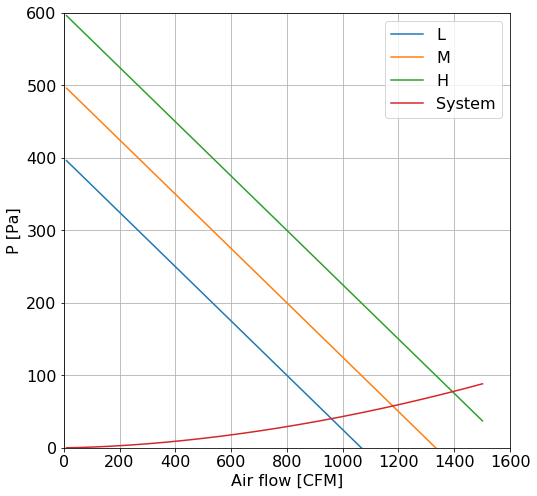

In [86]:
%matplotlib inline

fig_Qc = plt.figure(figsize=(8,8))
axis = fig_Qc.add_subplot(111)

axis.plot(x, Fan_L, label='L')
axis.plot(x, Fan_M, label='M')
axis.plot(x, Fan_H, label='H')
axis.plot(x,Delta_Pe_list, label='System')

axis.legend(loc='best',fontsize=16)
axis.set_ylabel('P [Pa]')
axis.set_xlabel('Air flow [CFM]')

axis.set_ylim(0,600)
axis.set_xlim(0,1600)
axis.grid()
set_all_fontsizes_from_axis(axis)

In [109]:
##escoamento interno
m_fluid = (10000/3600) #kg/s

rho_f_i=1018
rho_f_o=1019
rho_f_m=((1/2)*(1/rho_f_i+1/rho_f_o))**(-1) 
mi_f=0.001136
Pr_f = 8.512
k_f = 0.5238


Lh=(L1+2*delta_h)*N_t
Ai=np.pi*Di*L1*N_t
Amin_i = np.pi*(Di**2)/4
Gi=m_fluid/Amin_i
Re_i=(Gi*Di)/mi_f
if Re_i<2300:
    f_i=16/Re_i
    Nusselt_i=3.66
else:
    if Re_i>2300 and Re_i<4000:
        f_i=0.0054+(2.8*10**(-8))*Re_i**(3/2)
    if Re_i>4000 and Re_i<(10**7):
        #f_i=0.00128+0.1143*Re_i**(-1/3.2154)
        f_i = 0.25*(0.79*np.log(Re_i)-1.64)**-2
    if Re_i>2300 and Re_i<(5*(10**6)):
        Nusselt_i =((f_i/2)*(Re_i-1000)*Pr_f)/(1+12.7*((f_i/2)**0.5)*(Pr_f**(2/3)-1))

h_hex_i=(Nusselt_i*k_f)/Di
Rt_CI=1/(h_hex_i*Ai)
Delta_Pi=((Gi**2)/(2*rho_f_i))*(2*(rho_f_i/rho_f_o-1)+4*f_i*Lh*rho_f_i/(Di*rho_f_m))

W_p = Delta_Pi*m_fluid/rho_f_i
#W_p,Delta_Pi/10**5,h_hex_i,Re_i
f_i,Nusselt_i,Re_i,Di,h_hex_i

(0.003918916975116575,
 1169.6352816740857,
 196055.39084691243,
 0.01588,
 38580.287187713235)

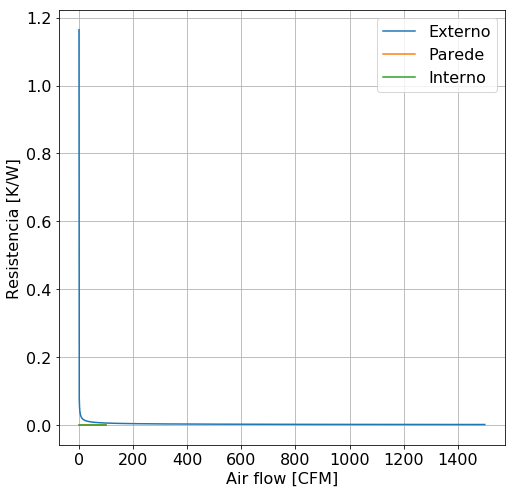

In [21]:
fig_Qc = plt.figure(figsize=(8,8))
axis = fig_Qc.add_subplot(111)

axis.plot(x,Rte_list,label='Externo')
axis.plot([0,100],[Rt_CD,Rt_CD],label='Parede')
axis.plot([0,100],[Rt_CI,Rt_CI],label='Interno')

axis.legend(loc='best',fontsize=16)
axis.set_ylabel('Resistencia [K/W]')
axis.set_xlabel('Air flow [CFM]')

axis.grid()
set_all_fontsizes_from_axis(axis)

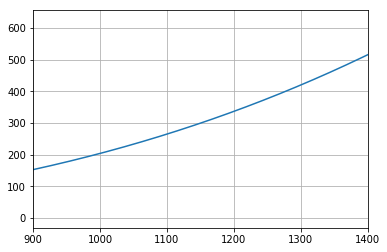

In [45]:
Rte_array = np.array(Rte_list)
UA_array = (Rt_CD+Rte_array+Rt_CI)**-1
W_array  = (np.asarray(Delta_Pe_list)*0.00047194745*rho)*x/(rho*0.1)

plt.plot(x,W_array)
plt.xlim([900,1400])
plt.grid(True)
plt.show()


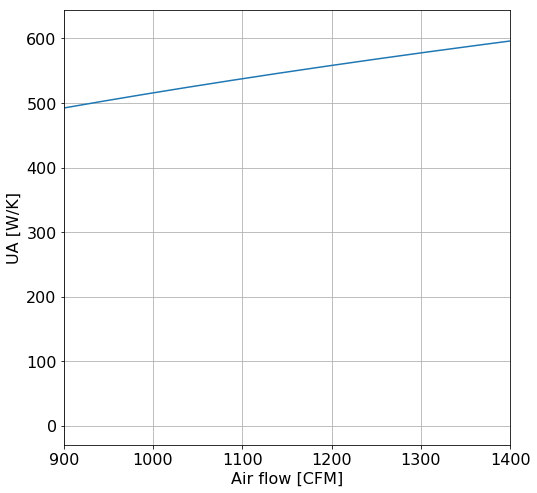

In [28]:
fig_Qc = plt.figure(figsize=(8,8))
axis = fig_Qc.add_subplot(111)

axis.plot(x,UA_array)


#axis.legend(loc='best',fontsize=16)
axis.set_ylabel('UA [W/K]')
axis.set_xlabel('Air flow [CFM]')
plt.xlim([900,1400])
axis.grid()
set_all_fontsizes_from_axis(axis)

In [315]:
#Calculando os ponto de intersecção entre sistema e ventiladores

#L
ponto_int_aux = Fan_L-np.array(Delta_Pe_list)
Fan_L_operacao_x = x[(np.abs(ponto_int_aux)).argmin()]
Fan_L_operacao_P = Delta_Pe_list[(np.abs(ponto_int_aux)).argmin()]
Fan_L_operacao_UA = UA_array[(np.abs(ponto_int_aux)).argmin()]
Fan_L_operacao_W = (Fan_L_operacao_P*0.00047194745*rho)*Fan_L_operacao_x/(rho*0.1)

#M
ponto_int_aux = Fan_M-np.array(Delta_Pe_list)
Fan_M_operacao_x = x[(np.abs(ponto_int_aux)).argmin()]
Fan_M_operacao_P = Delta_Pe_list[(np.abs(ponto_int_aux)).argmin()]
Fan_M_operacao_UA = UA_array[(np.abs(ponto_int_aux)).argmin()]
Fan_M_operacao_W = (Fan_M_operacao_P*0.00047194745*rho)*Fan_M_operacao_x/(rho*0.1)

#H
ponto_int_aux = Fan_H-np.array(Delta_Pe_list)
Fan_H_operacao_x = x[(np.abs(ponto_int_aux)).argmin()]
Fan_H_operacao_P = Delta_Pe_list[(np.abs(ponto_int_aux)).argmin()]
Fan_H_operacao_UA = UA_array[(np.abs(ponto_int_aux)).argmin()]
Fan_H_operacao_W = (Fan_H_operacao_P*0.00047194745*rho)*Fan_H_operacao_x/(rho*0.1)

In [316]:
Fan_L_operacao_x,Fan_L_operacao_P,Fan_L_operacao_UA,Fan_L_operacao_W

(973.01, 35.17003482387795, 936.4301795702266, 161.50417212831323)

In [245]:
Fan_M_operacao_x,Fan_M_operacao_P,Fan_M_operacao_UA,Fan_M_operacao_W

(1003.01, 124.00049442728923, 433.0628366126857, 586.978675123009)

In [246]:
Fan_H_operacao_x,Fan_H_operacao_P,Fan_H_operacao_UA,Fan_H_operacao_W

(1169.01, 161.46430907062157, 457.98502015713564, 890.8168200807073)

Trocador 1:
L1 = 0.127
L2 = 0.0215
L3 = 0.127
beta = 40

Trocador 2:
L1 = 0.127
L2 = 0.043
L3 = 0.127
beta = 40

Trocador 3:
L1 = 0.1524
L2 = 0.0215
L3 = 0.1524
beta = 40

Trocador 4:
L1 = 0.1524
L2 = 0.043
L3 = 0.1524
beta = 40

Trocador 5:
L1 = 0.2032
L2 = 0.0215
L3 = 0.2032
beta = 40

Trocador 6:
L1 = 0.2032
L2 = 0.043
L3 = 0.2032
beta = 40

In [105]:
i=5
W_Vent[i] = [Fan_L_operacao_W,Fan_M_operacao_W,Fan_H_operacao_W]
cfm_Vent[i] = [Fan_L_operacao_x,Fan_M_operacao_x,Fan_H_operacao_x]
UA_Vent[i] = [Fan_L_operacao_UA,Fan_M_operacao_UA,Fan_H_operacao_UA]
dP_Vent[i] = [Fan_L_operacao_P,Fan_M_operacao_P,Fan_H_operacao_P]
UA[i] = UA_array
W_f[i] = W_array


from matplotlib import *
rc('text',usetex = True)
rc('font', family='Times New Roman')



TypeError: 'int' object does not support item assignment

C:\Users\Usuario\Anaconda_new\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


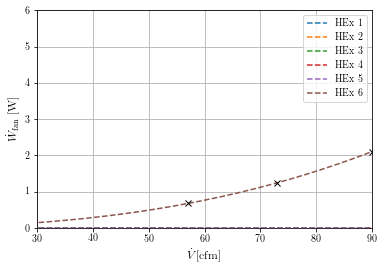

In [106]:
fig, ax = plt.subplots()

plt.plot(x,W_f[0],'--',label = 'HEx 1') #1 Row \ - $\sigma$ = 300 [$m^{-1}$]
plt.plot(x,W_f[1],'--',label = 'HEx 2')
plt.plot(x,W_f[2],'--',label = 'HEx 3')
plt.plot(x,W_f[3],'--',label = 'HEx 4')
plt.plot(x,W_f[4],'--',label = 'HEx 5')
plt.plot(x,W_f[5],'--',label = 'HEx 6')


plt.plot(cfm_Vent[0],W_Vent[0],'kx')
plt.plot(cfm_Vent[1],W_Vent[1],'kx')
plt.plot(cfm_Vent[2],W_Vent[2],'kx')
plt.plot(cfm_Vent[3],W_Vent[3],'kx')
plt.plot(cfm_Vent[4],W_Vent[4],'kx')
plt.plot(cfm_Vent[5],W_Vent[5],'kx')

plt.grid('True')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')
plt.legend()
plt.xlabel('$\dot{V}$[cfm]', fontsize = 'large')
plt.ylabel('$\dot{W}_\mathrm{fan}$ [W]', fontsize = 'large')
plt.xlim([30,90])
plt.ylim([0,6])
plt.show()

fig.savefig('W_fan_En.eps',format = 'eps', dpi=1200,bbox_inches='tight')

TypeError: 'int' object is not subscriptable

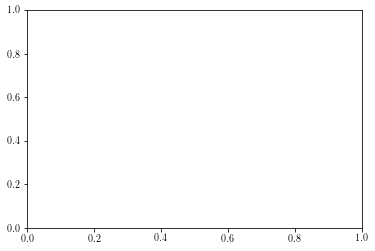

In [107]:
fig, ax = plt.subplots()

plt.plot(x,UA[0],'r--',label = '1 Fileira \ - $\sigma$ = 300 [$m^{-1}$]')
plt.plot(x,UA[1],'b--',label = '1 Fileira \ - $\sigma$ = 400 [$m^{-1}$]')
plt.plot(x,UA[2],'--',label = '1 Fileira \ - $\sigma$ = 500 [$m^{-1}$]')
plt.plot(x,UA[3],'--',label = '2 Fileiras - $\sigma$ = 300 [$m^{-1}$]')
plt.plot(x,UA[4],'--',label = '2 Fileiras - $\sigma$ = 400 [$m^{-1}$]')
plt.plot(x,UA[5],'--',label = '2 Fileiras - $\sigma$ = 500 [$m^{-1}$]')


plt.plot(cfm_Vent[0],UA_Vent[0],'kx')
plt.plot(cfm_Vent[1],UA_Vent[1],'kx')
plt.plot(cfm_Vent[2],UA_Vent[2],'kx')
plt.plot(cfm_Vent[3],UA_Vent[3],'kx')
plt.plot(cfm_Vent[4],UA_Vent[4],'kx')
plt.plot(cfm_Vent[5],UA_Vent[5],'kx')

plt.grid('True')
plt.legend()
plt.xlabel('Vaz\~ao de ar[cfm]', fontsize = 'large')
plt.ylabel('UA [W/K]', fontsize = 'large')
plt.xlim([30,100])
plt.ylim([0,40])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')
plt.show()

fig.savefig('UA_Port.eps',format = 'eps', dpi=500,bbox_inches='tight')

In [108]:
Cf = 148/3600*4148
for i in range(len(x)):
    for j in range(6):
        Ca[i] = x[i]*0.00047194745*1.225*1005
        NTU[i][j] = UA[j][i]/Ca[i]
        Cr[i] = Ca[i]/Cf
        K1[i][j] = 1-np.exp(-NTU[i][j]/2)
        E[j][i] = (1-np.exp(-2*K1[i][j]*Cr[i])*(1+Cr[i]*K1[i][j]**2))/Cr[i]
        ECr[j][i] = E[j][i]*Cr[i]
        QECr[j][i] = 38.271*np.log(ECr[j][i]) + 189.98 
        QW[j][i] =  QECr[j][i]-W_f[j][i]

TypeError: 'float' object does not support item assignment

In [109]:
#E_vent = np.zeros([6,3])
#K1_vent = np.zeros([6,3])
#Ca_vent = np.zeros([6,3])
#NTU_vent = np.zeros([6,3])
#Cr_vent = np.zeros([6,3])
#ECr_vent=np.zeros([6,3])

for i in range(6):
    for j in range(3):
        Ca_vent[i][j] = cfm_Vent[i][j]*0.00047194745*1.225*1005
        NTU_vent[i][j] = UA_Vent[i][j]/Ca_vent[i][j]
        K1_vent[i][j] = 1-np.exp(-NTU_vent[i][j]/2)
        Cr_vent[i][j] = Ca_vent[i][j]/Cf
        E_vent[i][j] =(1-np.exp(-2*K1_vent[i][j]*Cr_vent[i][j])*(1+Cr_vent[i][j]*K1_vent[i][j]**2))/Cr_vent[i][j]
        ECr_vent[i][j] = E_vent[i][j]*Cr_vent[i][j]
        QECr_vent[i][j] = 38.271*np.log(ECr_vent[i][j]) + 189.98 
        QW_vent[i][j] =  QECr_vent[i][j]-W_Vent[i][j]

C:\Users\Usuario\Anaconda_new\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


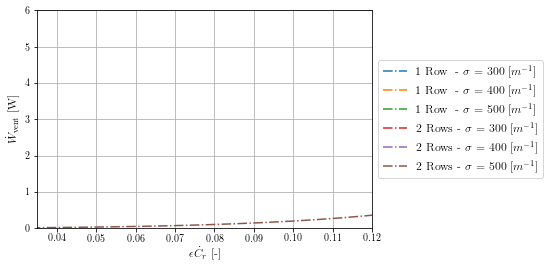

In [110]:
fig, ax = plt.subplots()

plt.plot(ECr[0],W_f[0],'-.',label = '1 Row \ - $\sigma$ = 300 [$m^{-1}$]')
plt.plot(ECr[1],W_f[1],'-.',label = '1 Row \ - $\sigma$ = 400 [$m^{-1}$]')
plt.plot(ECr[2],W_f[2],'-.',label = '1 Row \ - $\sigma$ = 500 [$m^{-1}$]')

plt.plot(ECr[3],W_f[3],'-.',label = '2 Rows  - $\sigma$ = 300  [$m^{-1}$]')
plt.plot(ECr[4],W_f[4],'-.',label = '2 Rows  - $\sigma$ = 400  [$m^{-1}$]')
plt.plot(ECr[5],W_f[5],'-.',label = '2 Rows  - $\sigma$ = 500  [$m^{-1}$]')

plt.plot(ECr_vent[0],W_Vent[0],'kx')
plt.plot(ECr_vent[1],W_Vent[1],'kx')
plt.plot(ECr_vent[2],W_Vent[2],'kx')

plt.plot(ECr_vent[3],W_Vent[3],'kx')
plt.plot(ECr_vent[4],W_Vent[4],'kx')
plt.plot(ECr_vent[5],W_Vent[5],'kx')

plt.legend()
plt.ylabel('$\dot{W}_\mathrm{vent}$ [W]', fontsize = 'large')
plt.xlabel('$\epsilon \dot{C}_r$ [-]', fontsize = 'large')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')
plt.ylim([0.01,6])
plt.xlim([0.035,0.12])

plt.grid()

fig.savefig('W_ECr.eps',format = 'eps', dpi=500,bbox_inches='tight')

C:\Users\Usuario\Anaconda_new\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


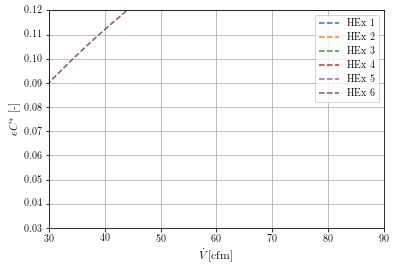

In [111]:
fig, ax = plt.subplots()

plt.plot(x,ECr[0],'--',label = 'HEx 1') #1 Row \ - $\sigma$ = 300 [$m^{-1}$]
plt.plot(x,ECr[1],'--',label = 'HEx 2')
plt.plot(x,ECr[2],'--',label = 'HEx 3')
plt.plot(x,ECr[3],'--',label = 'HEx 4')
plt.plot(x,ECr[4],'--',label = 'HEx 5')
plt.plot(x,ECr[5],'--',label = 'HEx 6')

plt.plot(cfm_Vent[0],ECr_vent[0],'kx')
plt.plot(cfm_Vent[1],ECr_vent[1],'kx')
plt.plot(cfm_Vent[2],ECr_vent[2],'kx')
plt.plot(cfm_Vent[3],ECr_vent[3],'kx')
plt.plot(cfm_Vent[4],ECr_vent[4],'kx')
plt.plot(cfm_Vent[5],ECr_vent[5],'kx')

plt.grid('True')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')
plt.legend()
plt.xlabel('$\dot{V}$[cfm]', fontsize = 'large')
plt.ylabel('$\epsilon C^*$ [-]', fontsize = 'large')

plt.xlim([30,90])
plt.ylim([0.03,0.12])

plt.show()

fig.savefig('ECr_En.eps',format = 'eps', dpi=1000,bbox_inches='tight')

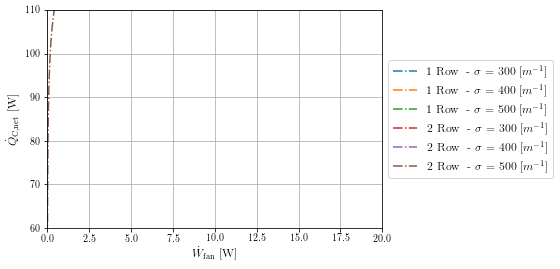

In [112]:
fig, ax = plt.subplots()

plt.plot(W_f[0],QW[0],'-.',label = '1 Row \ - $\sigma$ = 300 [$m^{-1}$]') #'HEx 1'
plt.plot(W_f[1],QW[1],'-.',label = '1 Row \ - $\sigma$ = 400 [$m^{-1}$]')
plt.plot(W_f[2],QW[2],'-.',label = '1 Row \ - $\sigma$ = 500 [$m^{-1}$]')

plt.plot(W_f[3],QW[3],'-.',label = '2 Row \ - $\sigma$ = 300 [$m^{-1}$]')
plt.plot(W_f[4],QW[4],'-.',label = '2 Row \ - $\sigma$ = 400 [$m^{-1}$]')
plt.plot(W_f[5],QW[5],'-.',label = '2 Row \ - $\sigma$ = 500 [$m^{-1}$]')

plt.plot(W_Vent[0],QW_vent[0],'kx')
plt.plot(W_Vent[1],QW_vent[1],'kx')
plt.plot(W_Vent[2],QW_vent[2],'kx')

plt.plot(W_Vent[3],QW_vent[3],'kx')
plt.plot(W_Vent[4],QW_vent[4],'kx')
plt.plot(W_Vent[5],QW_vent[5],'kx')

plt.xlabel('$\dot{W}_\mathrm{fan}$ [W]', fontsize = 'large')
plt.ylabel('$\dot{Q}_\mathrm{C,net}$ [W]', fontsize = 'large')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')
#plt.legend()
plt.xlim([0.01,20])
plt.ylim([60,110])

plt.grid()

fig.savefig('Qc_W_Eng.pdf',format = 'pdf', dpi=1200,bbox_inches='tight')

In [113]:
QECr,W_f[0]

(array([[         -inf,          -inf,          -inf, ...,          -inf,
                  -inf,          -inf],
        [         -inf,          -inf,          -inf, ...,          -inf,
                  -inf,          -inf],
        [         -inf,          -inf,          -inf, ...,          -inf,
                  -inf,          -inf],
        [         -inf,          -inf,          -inf, ...,          -inf,
                  -inf,          -inf],
        [         -inf,          -inf,          -inf, ...,          -inf,
                  -inf,          -inf],
        [-203.71508412,  -27.09011523,   -0.75403761, ...,  149.79417916,
          149.81230785,  149.83038242]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.

In [114]:
cfm_1 = [41.5,50.5,59.0,69.6,79.4]
UA_1 =  [8.4,9.0,9.5,9.9,10.3]
W_1  = [0.818420218,1.520958305,2.400131873,3.807149077,5.542601938]

cfm_2 = [39.8,48.8,60.0,70.4,80.5]
UA_2 = [9.9,10.7,11.8,12.6,13.3]
W_2 = [1.286586999,2.382417293,4.3189455,6.914383018,9.914460144]

cfm_3 = [39.8,51.6,59.8,70.4,79.9]
UA_3 =  [19.2,21.7,23.3,24.9,26.6]
W_3  = [1.628977996,3.489680235,5.334170713,8.411238811,12.20898464]

UA_H = UA_array
W_H = W_array

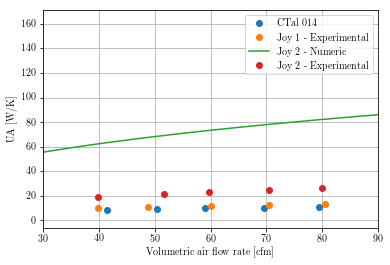

In [115]:
fig, ax = plt.subplots()

#plt.plot(x,UA_M,label = 'Joy 1 - Numeric ')
plt.plot(cfm_1,UA_1,'o',label = 'CTal 014')
plt.plot(cfm_2,UA_2,'o',label = 'Joy 1 - Experimental')


plt.plot(x,UA_H,label = 'Joy 2 - Numeric ')
plt.plot(cfm_3,UA_3,'o',label = 'Joy 2 - Experimental')

plt.grid(True)
plt.xlim([30,90])

plt.legend()

plt.xlabel('Volumetric air flow rate [cfm]')
plt.ylabel('UA [W/K]')

plt.show()

fig.savefig('UA_Joys.png',format = 'png', dpi=500,bbox_inches='tight')

NameError: name 'W_M' is not defined

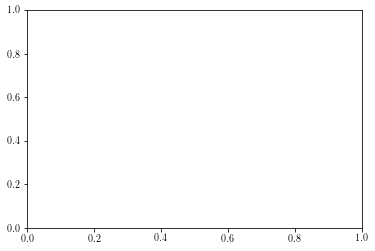

In [116]:
fig, ax = plt.subplots()

plt.plot(x,W_M,label = 'Joy 1 - Numeric ')
plt.plot(cfm_2,W_2,'o',label = 'Joy 1 - Experimental')


plt.plot(x,W_H,label = 'Joy 2 - Numeric ')
plt.plot(cfm_3,W_3,'o',label = 'Joy 2 - Experimental')
#plt.errorbar(cfm_S,UA_S, fmt='o', xerr=0, yerr=0.15*np.asarray(UA_S))

plt.plot(cfm_1,W_1,'o',label = 'CTal 014 - Experimental')


#plt.plot(x,W_H,label = 'HEx 2 - Numeric ')
#plt.plot(cfm_exp,W_exp,'o',label = 'HEx 2 - Experimental')
#plt.errorbar(cfm_exp,UA_exp, fmt='o', xerr=0, yerr=0.15*np.asarray(UA_exp))

#plt.plot(Fan_L_operacao_x,Fan_L_operacao_W,'kX')
#plt.plot(Fan_M_operacao_x,Fan_M_operacao_W,'kX')
#plt.plot(Fan_H_operacao_x,Fan_H_operacao_W,'kX')


plt.grid(True)
plt.xlim([30,90])

plt.ylim([0,20])

plt.legend()

plt.xlabel('Volumetric air flow rate [cfm]')
plt.ylabel('$\dot{W}_\mathrm{Pump}$ [W]')

plt.show()

fig.savefig('W_Joys_2.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots()

#plt.plot(x,W_L,label = 'HEx 1 - Numeric ')
#plt.plot(cfm_S,W_S,'o',label = 'HEx 1 - Experimental')
#plt.errorbar(cfm_S,UA_S, fmt='o', xerr=0, yerr=0.15*np.asarray(UA_S))



plt.plot(x,W_H,'g', label = 'HEx 2 - Numeric ')
plt.plot(cfm_exp,W_exp,'ro',label = 'HEx 2 - Experimental')
#plt.errorbar(cfm_exp,UA_exp, fmt='o', xerr=0, yerr=0.15*np.asarray(UA_exp))

plt.plot(Fan_L_operacao_x,Fan_L_operacao_W,'kX',label = 'Operation Points')
plt.plot(Fan_M_operacao_x,Fan_M_operacao_W,'kX')
plt.plot(Fan_H_operacao_x,Fan_H_operacao_W,'kX')


plt.grid(True)
plt.xlim([35,65])

plt.ylim([1,6])

plt.legend()

plt.xlabel('Volumetric air flow rate [cfm]')
plt.ylabel('$\dot{W}_\mathrm{Pump}$ [W]')

plt.show()

fig.savefig('Trocadores_Numerico_Operação.png',format = 'png', dpi=500,bbox_inches='tight')

In [43]:
UA = 500
Cf = 2500/3600*4148
Ca = 900*0.00047194745*1.225*1005
NTU = UA/Ca
K1 = 1-np.exp(-NTU/2)
K2 = 1-np.exp(-NTU/3)
Cr = Ca/Cf

E1  = (1-np.exp(-2*K1*Cr)*(1+Cr*K1**2))/Cr
E2  = (1-np.exp(-3*K2*Cr)*(1+Cr*K2**2*(3-K2)+3*Cr**2*(K2**4)/2))/Cr
E3  = (1-np.exp((NTU**0.22)*(np.exp(-Cr*NTU**0.78)-1)/Cr))

In [44]:
E3,Cr,E3*Cr*100

(0.583989833111515, 0.1815357016581726, 10.601500411513799)

In [ ]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv

rc('text',usetex = True)
rc('font', family='serif')

In [ ]:
E_vent = np.zeros([6,3])
K1_vent = np.zeros([6,3])
Ca_vent = np.zeros([6,3])
NTU_vent = np.zeros([6,3])
Cr_vent = np.zeros([6,3])
ECr_vent=np.zeros([6,3])

for i in range(6):
    for j in range(3):
        Ca_vent[i][j] = cfm_Vent[i][j]*0.00047194745*1.225*1005
        NTU_vent[i][j] = UA_Vent[i][j]/Ca_vent[i][j]
        K1_vent[i][j] = 1-np.exp(-NTU_vent[i][j]/2)
        Cr_vent[i][j] = Ca_vent[i][j]/Cf
        E_vent[i][j] =(1-np.exp(-2*K1_vent[i][j]*Cr_vent[i][j])*(1+Cr_vent[i][j]*K1_vent[i][j]**2))/Cr_vent[i][j]
        ECr_vent[i][j] = E_vent[i][j]*Cr_vent[i][j] 

In [ ]:
ECr,NTU,Ca

TypeError: 'float' object is not subscriptable

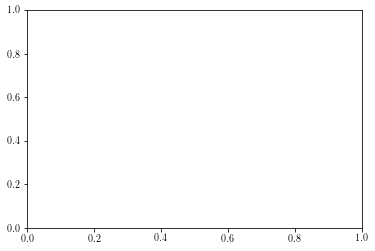

In [117]:
fig, ax = plt.subplots()

plt.plot(NTU[0],ECr[0],'o--',label = 'Trocador 1')
plt.plot(NTU[1],ECr[1],'o--',label = 'Trocador 2')
plt.plot(NTU[2],ECr[2],'o--',label = 'Trocador 3')
plt.plot(NTU[3],ECr[3],'o--',label = 'Trocador 4')
plt.plot(NTU[4],ECr[4],'o--',label = 'Trocador 5')
plt.plot(NTU[5],ECr[5],'o--',label = 'Trocador 6')

plt.grid('True')
plt.legend()
plt.xlabel('Volumetric air flow rate [cfm]')
plt.ylabel('$\epsilon \ \dot{C}_r$ [-]')

plt.show()

fig.savefig('ECr.png',format = 'png', dpi=500,bbox_inches='tight')

In [118]:
dT = [17.36792415,20.54764981]
Qc = [26.09605464,24.31890865]
x = np.arange(16,21)

C:\Users\Usuario\Anaconda_new\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


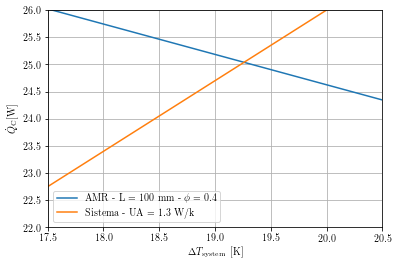

In [119]:
fig, ax = plt.subplots()

plt.plot(dT,Qc,label = 'AMR - L = 100 mm - $\phi = 0.4$')
plt.plot(x,1.3*x, label = 'Sistema - UA = 1.3 W/k')


plt.grid(True)

plt.grid('True')
plt.legend()
plt.xlim([17.5,20.5])
plt.ylim([22,26])
plt.xlabel('$\Delta T_{\mathrm{system}}$ [K]')
plt.ylabel('$\dot{Q}_\mathrm{C}$[W]')


plt.show()

fig.savefig('Gislaine.png',format = 'png', dpi=500,bbox_inches='tight')